In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2
import os
import random
from six.moves import cPickle as pickle
import glob

In [ ]:
"""for key in test_img.keys():
    for i in range(len(test_img[key])):
        img = test_img[key][i]
        name = "{:03d}_{}".format(key, str(np.random.normal())[3:9])
        cv2.imwrite('./test/{}.jpg'.format(name), img)"""

In [2]:
def create_image_lists(image_dir):
    if not os.path.isdir(image_dir):
        print("There is no directoriy '{}'".format(image_dir))
    directories = ['train', 'test']
    image_list = {}
    for directory in directories:
        file_list = []
        image_list[directory] = []
        file_glob = os.path.join(image_dir, directory,'*'+ '.jpg')
        file_list.extend(glob.glob(file_glob))
        if not file_list:
            print('No files found')
        else:
            for f in file_list:
                filename = os.path.split(f)[1]
                record = {'image': f, 'filename': filename}
                image_list[directory].append(record)
        random.shuffle(image_list[directory])
        no_of_images = len(image_list[directory])
        print ('No. of %s files: %d' % (directory, no_of_images))
    return image_list


def read_dataset(image_dir):
    pickle_filename = "file_list.pickle"
    pickle_filepath = os.path.join(pickle_filename)
    if not os.path.exists(pickle_filepath):
        result = create_image_lists(image_dir)
        print ("Pickling ...")
        with open(pickle_filepath, 'wb') as f:
            pickle.dump(result, f)
    else:
        print ("Found pickle file!")

    with open(pickle_filepath, 'rb') as f:
        result = pickle.load(f)
        training_records = result['train']
        test_records = result['test']
        del result
    print("Make pickle files.")
    
    return training_records, test_records

In [3]:
IMAGE_DIR = './'

In [4]:
tr_file_list, te_file_list = read_dataset(IMAGE_DIR)

Found pickle file!
Make pickle files.


In [5]:
tr_file_list

[{'filename': '001_262685.jpg', 'image': './train\\001_262685.jpg'},
 {'filename': '002_405487.jpg', 'image': './train\\002_405487.jpg'},
 {'filename': '001_119170.jpg', 'image': './train\\001_119170.jpg'},
 {'filename': '000_227217.jpg', 'image': './train\\000_227217.jpg'},
 {'filename': '008_573853.jpg', 'image': './train\\008_573853.jpg'},
 {'filename': '009_055401.jpg', 'image': './train\\009_055401.jpg'},
 {'filename': '009_006403.jpg', 'image': './train\\009_006403.jpg'},
 {'filename': '001_105752.jpg', 'image': './train\\001_105752.jpg'},
 {'filename': '000_585230.jpg', 'image': './train\\000_585230.jpg'},
 {'filename': '001_051679.jpg', 'image': './train\\001_051679.jpg'},
 {'filename': '001_500459.jpg', 'image': './train\\001_500459.jpg'},
 {'filename': '000_849966.jpg', 'image': './train\\000_849966.jpg'},
 {'filename': '003_679872.jpg', 'image': './train\\003_679872.jpg'},
 {'filename': '009_090198.jpg', 'image': './train\\009_090198.jpg'},
 {'filename': '000_428266.jpg', 'i

In [6]:
img_train = np.array([ cv2.imread(file['image'], cv2.IMREAD_GRAYSCALE) for file in tr_file_list])
img_test = np.array([ cv2.imread(file['image'], cv2.IMREAD_GRAYSCALE) for file in te_file_list])

In [7]:
label_train = np.array([ int(file['filename'][0:3]) for file in tr_file_list])
label_test = np.array([ int(file['filename'][0:3]) for file in te_file_list])

In [8]:
print(img_train.shape, img_test.shape, label_train.shape, label_test.shape)

(2837, 28, 28) (9995, 28, 28) (2837,) (9995,)


In [9]:
cls_num = {}
for i in range(10):
    cls_num[i] = 0
for i in range(len(label_train)):
    cls_num[label_train[i]] += 1

In [10]:
cls_num

{0: 999, 1: 998, 2: 300, 3: 100, 4: 100, 5: 10, 6: 10, 7: 10, 8: 10, 9: 300}

In [11]:
cls_img = {}
for i in range(10):
    cls_img[i] = []
for i in range(len(img_test)):
    cls_img[label_test[i]].append(img_test[i])
for i in range(10):
    cls_img[i] = np.array(cls_img[i])

In [12]:
inds = np.array([], dtype=np.int64)
for key in cls_num.keys():
    if cls_num[key] < 500:
        temp_inds = np.where(label_train[:] == key)[0]
        inds = np.concatenate((temp_inds, inds), axis=0)

In [13]:
inds.shape

(840,)

In [39]:
over_batchs = np.array(range(len(img_train)))
for i in range(1):
    over_batchs = np.hstack((over_batchs, inds))

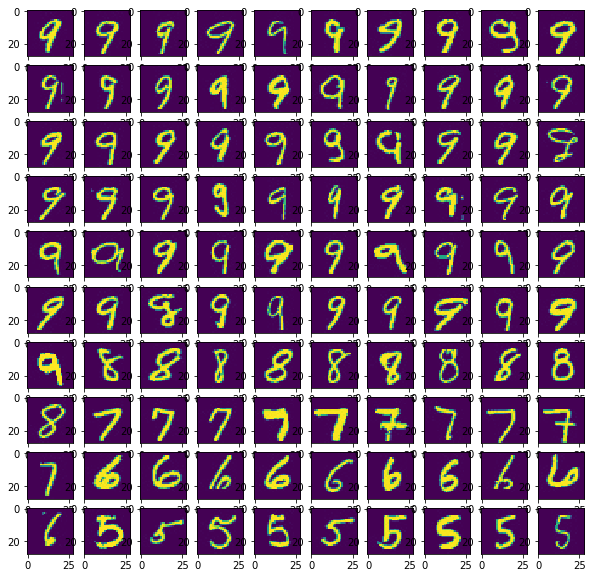

In [123]:
plt_img = img_train[inds].reshape(len(inds), 28, 28)
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
check = 239
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(plt_img[10*i+j + check])

    #print(plt_img[10*i + check : 10*(i+1) + check])
        
plt.show()

[4 0 2 3 2 2 0 0 1 0]
[5 1 2 1 1 0 1 1 1 9]
[0 6 1 9 1 4 0 1 1 1]
[0 3 9 1 2 3 9 0 9 3]
[0 0 3 0 0 0 1 0 1 1]
[0 1 1 3 0 2 1 2 9 0]
[0 3 8 1 0 1 2 1 1 2]
[1 2 1 1 1 4 0 0 0 9]
[9 0 1 9 0 0 0 0 1 0]
[0 0 1 1 0 0 8 1 0 0]


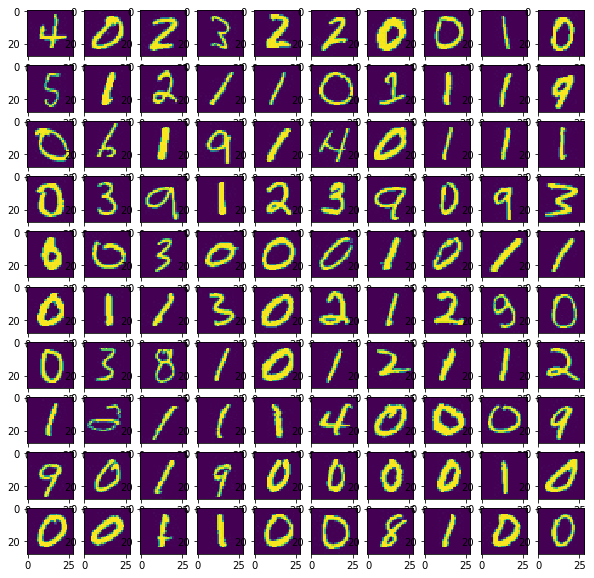

In [69]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
check = 2200
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img_train[10*i+j + check])

    print(label_train[10*i + check : 10*(i+1) + check])
        
plt.show()

In [14]:
img_row, img_col = img_train.shape[1], img_train.shape[2]
img_depth = 1

img_train = img_train.reshape(img_train.shape[0], img_row, img_col, img_depth)
img_test = img_test.reshape(img_test.shape[0], img_row, img_col, img_depth)
img_train = img_train.astype('float32')
img_test = img_test.astype('float32')
img_train /= 255
img_test /= 255

In [15]:
X = tf.placeholder(tf.float32, [None, img_row, img_col, img_depth])
Y = tf.placeholder(tf.int64, [None])
training = tf.placeholder(tf.bool)

with tf.variable_scope('model_1/conv_layer'):
    conv1 = tf.layers.conv2d(inputs=X, filters=32, kernel_size=[3, 3],
                            padding='SAME', activation=tf.nn.relu, name='conv1')
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], 
                                    padding='SAME', strides=2, name='pool1')
    conv2 = tf.layers.conv2d(inputs=pool1, filters=32, kernel_size=[3, 3],
                            padding='SAME', activation=tf.nn.relu, name='conv2')
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], 
                                    padding='SAME', strides=2, name='pool2')
    conv3 = tf.layers.conv2d(inputs=pool2, filters=32, kernel_size=[3, 3],
                            padding='SAME', activation=tf.nn.relu, name='conv3')
    pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], 
                                padding='SAME', strides=2, name='pool3')
with tf.variable_scope('model_1/fc_layer'):
    flat_num = int(pool3.shape[1] * pool3.shape[2] * pool3.shape[3])
    flat = tf.reshape(pool3, [-1, 4*4*32], name='flat')
    dense1 = tf.layers.dense(inputs=flat, units=1024, activation=tf.nn.relu, 
                             name='dense1')
    drop1 = tf.layers.dropout(inputs=dense1, rate=0.5, training=training)
    dense2 = tf.layers.dense(inputs=drop1, units=512, activation=tf.nn.relu, 
                             name='dense2')
    drop2 = tf.layers.dropout(inputs=dense2, rate=0.5, training=training)
    logits = tf.layers.dense(inputs=drop2, units=10)

In [16]:
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [44]:
def get_accuracy(sess, logits, img, label, batch_size):    
    if len(img) < batch_size:
        logit = sess.run(logits, feed_dict={X: img, training: False})
    else:
        total_batch = int(len(img) / batch_size) + 1
        num_label = int(logits.shape[-1])
        logit = np.array([], dtype=np.int64).reshape(0, num_label)
        idxs = range(len(img))
        for i in range(total_batch):
            if i < (total_batch - 1):
                idxs_i = idxs[i * batch_size : (i + 1) * batch_size]
            else:
                idxs_i = idxs[i * batch_size : len(img)]
            feed_dict = {X: img[idxs_i], training: False}
            logit = np.concatenate((logit, sess.run(logits, feed_dict=feed_dict)), axis=0)

    correct_pred = np.equal(np.argmax(logit, 1), label).astype(np.float32)
    accuracy = np.mean(correct_pred)
    
    return accuracy, logit, correct_pred

In [46]:
# overslampling
batch_size = 32
epochs = 30

print ('Learning Started.')

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    start = time.time()
    avg_cost = 0
    total_batch = int(len(over_batchs) / batch_size) + 1
    
    idxs = np.random.permutation(over_batchs)
    for i in range(total_batch):
        if i < (total_batch - 1):        
            idxs_i = idxs[i * batch_size : (i + 1) * batch_size]
        else:
            idxs_i = idxs[i * batch_size : len(over_batchs)]
            
        feed_dict = {X: img_train[idxs_i], Y: label_train[idxs_i], training: True}    
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    
    print ('Epoch : {:02d} , Cost : {:.5f}'.format(epoch + 1, avg_cost))
    train_accuracy, _, _ = get_accuracy(sess, logits, img_train, label_train, batch_size)
    print ('Test Accuracy : {:.5f}'.format(train_accuracy))
    test_accuracy, _, _ = get_accuracy(sess, logits, img_test, label_test, batch_size)
    print ('Test Accuracy : {:.5f}'.format(test_accuracy))
    print ('Elapsed time : {:.5f}'.format(time.time() - start))

Learning Started.
Epoch : 01 , Cost : 0.63024
Test Accuracy : 0.96546
Test Accuracy : 0.56848
Elapsed time : 1.19819
Epoch : 02 , Cost : 0.16357
Test Accuracy : 0.97920
Test Accuracy : 0.64182
Elapsed time : 1.13502
Epoch : 03 , Cost : 0.09239
Test Accuracy : 0.99154
Test Accuracy : 0.79290
Elapsed time : 1.11296
Epoch : 04 , Cost : 0.05855
Test Accuracy : 0.99119


KeyboardInterrupt: 

In [45]:
# epochs 30
batch_size = 256
epochs = 30

print ('Learning Started.')

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    start = time.time()
    avg_cost = 0
    total_batch = int(img_train.shape[0] / batch_size) + 1
    
    idxs = np.random.permutation(range(len(img_train)))
    for i in range(total_batch):
        if i < (total_batch - 1):        
            idxs_i = idxs[i * batch_size : (i + 1) * batch_size]
        else:
            idxs_i = idxs[i * batch_size : len(img_train)]
            
        feed_dict = {X: img_train[idxs_i], Y: label_train[idxs_i], training: True}    
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    
    print ('Epoch : {:02d} , Cost : {:.5f}'.format(epoch + 1, avg_cost))
    train_accuracy, _, _ = get_accuracy(sess, logits, img_train, label_train, batch_size)
    print ('Test Accuracy : {:.5f}'.format(train_accuracy))
    test_accuracy, _, _ = get_accuracy(sess, logits, img_test, label_test, batch_size)
    print ('Test Accuracy : {:.5f}'.format(test_accuracy))
    print ('Elapsed time : {:.5f}'.format(time.time() - start))

Learning Started.
Epoch : 01 , Cost : 1.45821
Test Accuracy : 0.77476
Test Accuracy : 0.30665
Elapsed time : 0.58255
Epoch : 02 , Cost : 0.66666
Test Accuracy : 0.86641
Test Accuracy : 0.38499
Elapsed time : 0.50534
Epoch : 03 , Cost : 0.43013
Test Accuracy : 0.91329
Test Accuracy : 0.45633
Elapsed time : 0.50033
Epoch : 04 , Cost : 0.28097
Test Accuracy : 0.93373
Test Accuracy : 0.49005
Elapsed time : 0.50334
Epoch : 05 , Cost : 0.20766
Test Accuracy : 0.94290
Test Accuracy : 0.51166
Elapsed time : 0.51036
Epoch : 06 , Cost : 0.17839
Test Accuracy : 0.96898


KeyboardInterrupt: 

In [47]:
# epochs 30
for num in range(10):
    specific_label = np.full((len(cls_img[num])), num)
    specific_test_accuracy, _, _ = get_accuracy(sess, logits, np.expand_dims(cls_img[num], axis=-1), 
                                                                    specific_label, batch_size)
    print("The specific accurcy of {} : {:.5f}".format(num, specific_test_accuracy))
acc, _, _ = get_accuracy(sess, logits, img_test, label_test, batch_size)
print("Total accuracy : {:.5f}".format(acc))

The specific accurcy of 0 : 0.99796
The specific accurcy of 1 : 0.99471
The specific accurcy of 2 : 0.97187
The specific accurcy of 3 : 0.98614
The specific accurcy of 4 : 0.95316
The specific accurcy of 5 : 0.52915
The specific accurcy of 6 : 0.80376
The specific accurcy of 7 : 0.57685
The specific accurcy of 8 : 0.13786
The specific accurcy of 9 : 0.96230
Total accuracy : 0.79380


0.529148
420 / 892
wrong prediction
[9 3 3 0 0 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 9]
[3 3 3 3 0 3 3 3 6 3 0 3 3 6 3 3 0 9 3 3 3]
[9 3 3 9 3 3 3 3 3 3 3 0 3 3 3 3 3 9 3 0 9]
[0 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 2 3]
[3 3 3 3 9 3 3 0 3 3 9 9 3 0 9 3 3 3 3 0 3]
[3 3 3 3 9 3 3 3 3 3 3 3 3 3 3 3 0 3 3 0 3]
[0 3 3 3 0 6 4 3 3 3 3 3 3 3 3 3 3 6 3 3 9]
[3 9 2 3 3 3 3 3 4 3 3 3 3 3 0 3 3 3 3 3 0]
[3 3 3 3 3 6 0 3 0 3 3 4 3 3 0 9 3 3 9 3 3]
[3 3 3 3 3 3 3 3 3 9 3 3 9 8 3 3 3 0 3 3 3]
[3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 0 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 0 3 9]
[6 3 3 3 3 3 0 3 0 3 3 0 3 3 3 3 3 3 3 3 3]
[3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 0 3 3 3 3 3 3 8 3 3 3 0 3 3 3 3 3 3]
[0 3 3 9 3 0 3 3 3 3 3 0 3 3 3 9 3 3 3 3 3]
[3 3 9 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3]
[3 3 3 3 9 3 3 3 3 3 3 3 3 3 3 3 0 3 3 9 3]
[0 3 3 3 3 3 3 3 9 3 3 9 3 9 0 0 3 3 3 3 3]
[3 3 9 3 3 6 3 3 3 3 9 3 3 3 3 1 3 3 3 3 3]
[]


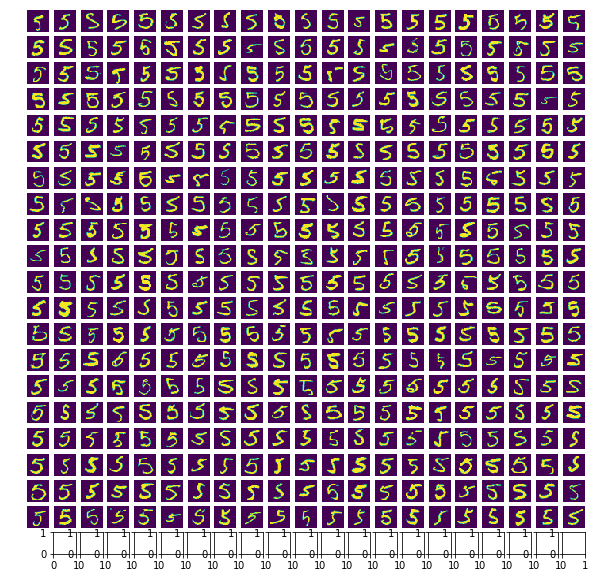

In [50]:
num = 5
specific_label = np.full((len(cls_img[num])), num)
specific_test_accuracy, test_logit, test_predict = get_accuracy(sess, logits, np.expand_dims(cls_img[num], axis=-1), specific_label, batch_size)
print(specific_test_accuracy)

logit = np.argmax(test_logit, 1)
indx = np.where(test_predict[:] == 0.)[0]
print("{} / {}".format(len(indx), len(cls_img[num])))
nrow = np.ceil(np.sqrt(len(indx))).astype(np.int)
fig, ax = plt.subplots(nrows=nrow, ncols=nrow, figsize = (10, 10))
img = cls_img[num][indx]
for i in range(nrow):
    for j in range(nrow):
        if nrow*i+j >= len(indx):
            ax[i][j].axis('off')
            break
        else:
            ax[i][j].imshow(img[nrow*i+j])
            ax[i][j].axis('off')

logit = logit[indx]

print("wrong prediction")
for i in range(nrow):
    if nrow*(i+1) < len(indx):
        print(logit[nrow*i : nrow*(i+1)])
    else:
        print(logit[nrow*i : len(indx)])

plt.show()